### 引言：
- Pandas，Python data analysis library。
- Excel的弱点在于：从外部数据源获取大型数据集、处理统计数据、时序和交互式图表。
- Pandas的主要功能是*向量化*和*数据对齐*。
- Pandas的主要数据结构：DataFrame（数据帧）和Series（序列）。

#### 1. Panda的主要组件：索引、列和数据
- DataFrame：一个二维的表格型数据结构，它含有一组有序的列，每列可以是不同的值类型（数值、字符串、布尔值等）。
- Series：一维的标签化数组，可以看作是特殊的DataFrame。

In [1]:
import pandas as pd

注意：在 Python 3.9 或者更高版本中使用 pd.read_excel 函数，那么一定要
确保 pandas 版本在 1.2 以上，否则会在读取 xlsx 文件时发生错误。

In [2]:
pd.read_excel("xl/course_participants.xlsx")

,user_id,name,age,counrty,score,continent
0,1001,Mark,55,Italy,4.5,Europe
1,1000,John,33,USA,6.7,America
2,1002,Tim,41,USA,3.9,America
3,1003,Jenny,12,Germany,9.0,Europe


In [3]:
data=[["Mark", 55, "Italy", 4.5, "Europe"],
["John", 33, "USA", 6.7, "America"],
["Tim", 41, "USA", 3.9, "America"],
["Jenny", 12, "Germany", 9.0, "Europe"]]

In [4]:
df = pd.DataFrame(data=data,
                  # 创建 DataFrame时，除了数据本身，还需要提供 columns 参数和 index 参数
                  columns=["name", "age", "country",
                           "score", "continent"],
                  index=[1001, 1000, 1002, 1003])
df

,name,age,country,score,continent
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [5]:
df.info()  # 查看数据点数量和每一列的数据类型

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, 1001 to 1003
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   name       4 non-null      object 
 1   age        4 non-null      int64  
 2   country    4 non-null      object 
 3   score      4 non-null      float64
 4   continent  4 non-null      object 
dtypes: float64(1), int64(1), object(3)
memory usage: 192.0+ bytes


In [6]:
df.dtypes  # 只查看列的数据类型

name          object
age            int64
country       object
score        float64
continent     object
dtype: object

#### 2. 索引（行）
DataFrame的行标签被称为索引（index）。如果你找不到一个有意义的索引，那么在构造DataFrame 时可以直接省略，pandas 会自动创建一个从 0 开始的整数索引。
索引可以让pandas更快地查询数据，对很多常见的操作（比如将两个DataFrame组合起来），索引是必不可少的。

In [7]:
df.index

Index([1001, 1000, 1002, 1003], dtype='int64')

In [16]:
# 增加新的索引列
df.index.name = "user_id"
df

In [17]:
# 链式方法调用（method chaining）
# reset_index()先返回一个DataFrame，将user_id还原成普通列
# set_index()可以设置新的索引列名称
df.reset_index().set_index('name')

,user_id,age,country,score,continent
name,,,,,
Mark,1001,55,Italy,4.5,Europe
John,1000,33,USA,6.7,America
Tim,1002,41,USA,3.9,America
Jenny,1003,12,Germany,9.0,Europe


In [18]:
# 用reindex()方法更换索引
df.reindex([999, 1000, 1001, 1004])

,name,age,country,score,continent
user_id,,,,,
999,NaN,NaN,NaN,NaN,NaN
1000,John,33.0,USA,6.7,America
1001,Mark,55.0,Italy,4.5,Europe
1004,NaN,NaN,NaN,NaN,NaN


由于新的索引中没有999和1004，所以对应的列内容显示为NaN。这是一个现实工作中数据对齐的例子

In [22]:
# 使用sort_index()可以按索引进行排序
df.sort_index()

,name,age,country,score,continent
user_id,,,,,
1000,John,33,USA,6.7,America
1001,Mark,55,Italy,4.5,Europe
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [25]:
# 使用sort_values()可以按一列或多列进行排序
# 先按age进行升序排列，再按name进行升序排列
df.sort_values(['age', 'name'])

,name,age,country,score,continent
user_id,,,,,
1003,Jenny,12,Germany,9.0,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1001,Mark,55,Italy,4.5,Europe


In [27]:
# 如果只按某一列排序，则不需要[]
df.sort_values('age')

,name,age,country,score,continent
user_id,,,,,
1003,Jenny,12,Germany,9.0,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1001,Mark,55,Italy,4.5,Europe


#### 3.行

In [29]:
# 获取行标签
df.columns

Index(['name', 'age', 'country', 'score', 'continent'], dtype='object')

In [30]:
# 给列命名
df.columns.name = 'propertities'
df

propertities,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


propertities相当于是给所有的列标签取了一个名字。而之前的user_id是给索引命名

In [43]:
# 对列名进行重命名
df.rename(columns={'name':'First Name', 'age':'Age', 'country':'Country', 'score':'Score', 'continent':'Continent'})
# 注意，这里无法对user_id（索引名称）和propertities（列标签命名）重新命名
df.rename(index={1001:'a+1', 1000:9000, 1002:9002, 1003:9003})

propertities,name,age,country,score,continent
user_id,,,,,
a+1,Mark,55,Italy,4.5,Europe
9000,John,33,USA,6.7,America
9002,Tim,41,USA,3.9,America
9003,Jenny,12,Germany,9.0,Europe


In [40]:
# 删除某些列或者索引，可以使用df.drop()
df.drop(columns=['name','continent'],
        index=[1000, 1002])

propertities,age,country,score
user_id,,,
1001,55,Italy,4.5
1003,12,Germany,9.0


In [42]:
df.T  # df.transpose()的缩写

user_id,1001,1000,1002,1003
propertities,,,,
name,Mark,John,Tim,Jenny
age,55,33,41,12
country,Italy,USA,USA,Germany
score,4.5,6.7,3.9,9.0
continent,Europe,America,America,Europe


In [49]:
df.loc[:,['continent', 'country', 'name', 'age', 'score']]  # 按照特定的列顺序排列

propertities,continent,country,name,age,score
user_id,,,,,
1001,Europe,Italy,Mark,55,4.5
1000,America,USA,John,33,6.7
1002,America,USA,Tim,41,3.9
1003,Europe,Germany,Jenny,12,9.0


In [50]:
# 也可以使用reindex()方法
df.reindex(columns=['continent', 'country', 'name', 'age', 'score'])

propertities,continent,country,name,age,score
user_id,,,,,
1001,Europe,Italy,Mark,55,4.5
1000,America,USA,John,33,6.7
1002,America,USA,Tim,41,3.9
1003,Europe,Germany,Jenny,12,9.0


### 数据操作
#### 选取数据：用标签和位置访问数据
1. 访问DataFrame数据的最常见方式是用***标签***来引用数据，使用loc属性指定想获得的行和列。
df.loc[row_selection, columns_selection]
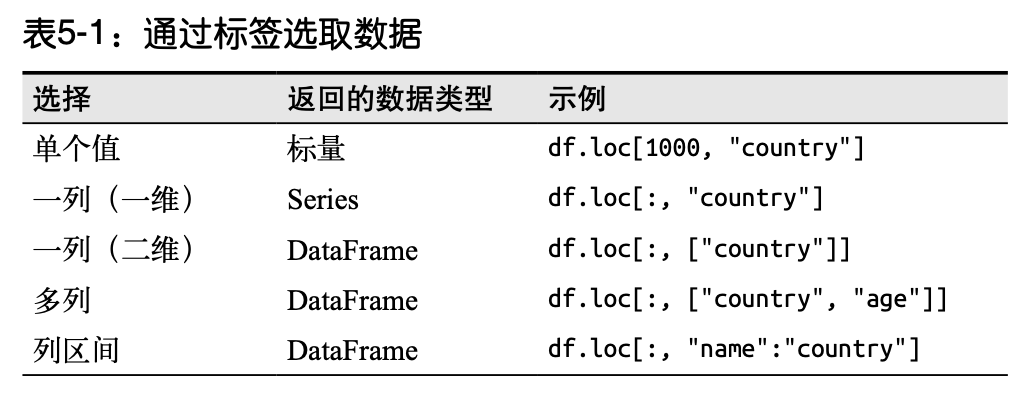

In [51]:
df.loc[1000, 'country']

'USA'

In [55]:
df.loc[:, 'country']  # 得到的是Series

user_id
1001      Italy
1000        USA
1002        USA
1003    Germany
Name: country, dtype: object

In [56]:
df.loc[:, ['country']]  # 得到的是DataFrame

propertities,country
user_id,
1001,Italy
1000,USA
1002,USA
1003,Germany


In [59]:
df.loc[:, ['name', 'country', 'continent']]

propertities,name,country,continent
user_id,,,
1001,Mark,Italy,Europe
1000,John,USA,America
1002,Tim,USA,America
1003,Jenny,Germany,Europe


In [62]:
df.loc[:, 'name':'country']  # 注意，切片表示时，包头又包尾

propertities,name,age,country
user_id,,,
1001,Mark,55,Italy
1000,John,33,USA
1002,Tim,41,USA
1003,Jenny,12,Germany


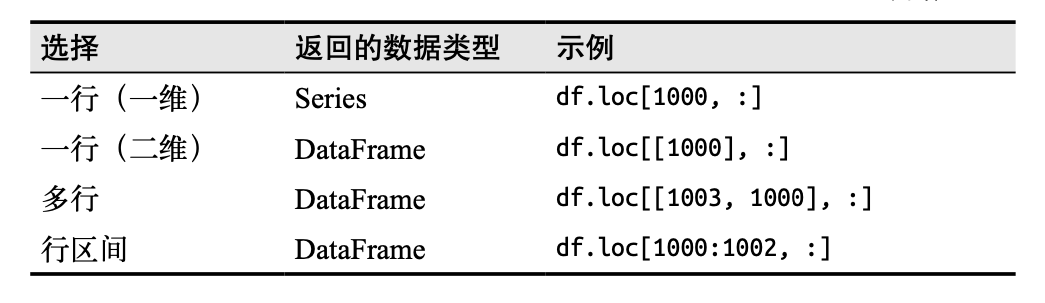

In [64]:
df.loc[1000, :]  # Series数据

propertities
name            John
age               33
country          USA
score            6.7
continent    America
Name: 1000, dtype: object

In [65]:
df.loc[[1000],:]

propertities,name,age,country,score,continent
user_id,,,,,
1000,John,33,USA,6.7,America


In [66]:
df.loc[[1003, 1000], :]

propertities,name,age,country,score,continent
user_id,,,,,
1003,Jenny,12,Germany,9.0,Europe
1000,John,33,USA,6.7,America


In [68]:
df.loc[1000:1003, :]

propertities,name,age,country,score,continent
user_id,,,,,
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


列选择的捷径：
通常写成df.loc[:, columns_selection]
也可以写成df[columns_selection]

In [71]:
df['name']  # 得到的是Series数据

user_id
1001     Mark
1000     John
1002      Tim
1003    Jenny
Name: name, dtype: object

In [78]:
df[['name', 'age']].sort_values('age')  # 得到的是DataFrame数据

propertities,name,age
user_id,,
1003,Jenny,12
1000,John,33
1002,Tim,41
1001,Mark,55


2. 通过***位置***选取数据：iloc属性（整数位置）**半开半闭**区间
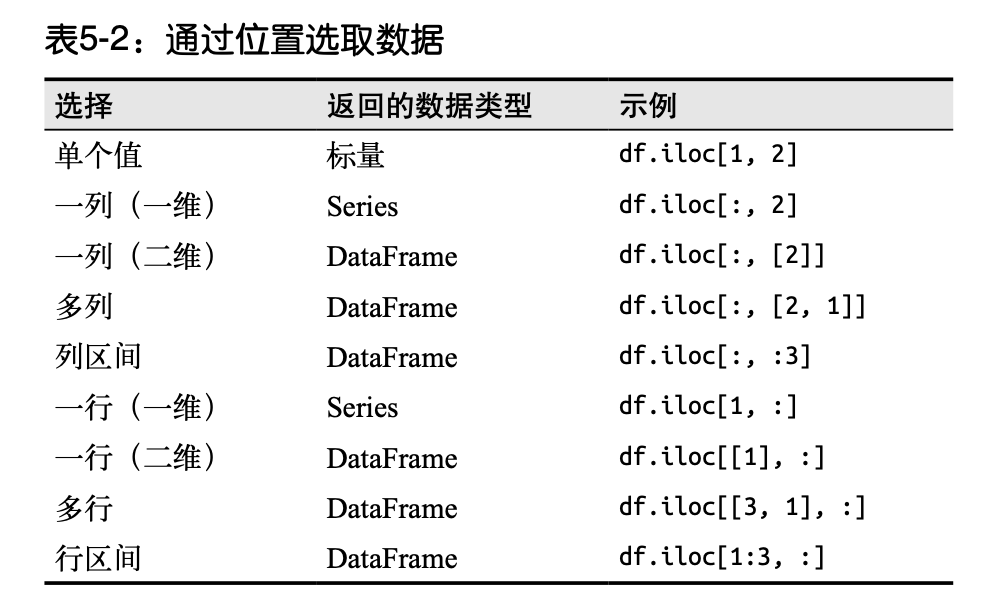

In [80]:
df

propertities,name,age,country,score,continent
user_id,,,,,
1001,Mark,55,Italy,4.5,Europe
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [81]:
df.iloc[0,3]

4.5

In [82]:
df.iloc[:, 2]

user_id
1001      Italy
1000        USA
1002        USA
1003    Germany
Name: country, dtype: object

In [84]:
df.iloc[:, [2]]

propertities,country
user_id,
1001,Italy
1000,USA
1002,USA
1003,Germany


In [85]:
df.iloc[:, :3]

propertities,name,age,country
user_id,,,
1001,Mark,55,Italy
1000,John,33,USA
1002,Tim,41,USA
1003,Jenny,12,Germany


In [86]:
df.iloc[1:3, :3]

propertities,name,age,country
user_id,,,
1000,John,33,USA
1002,Tim,41,USA


3. 使用**布尔**索引选取数据（常用来筛选DataFrame的行）和Excel中的AutoFilter函数类似

In [89]:
# 先建立筛选规则
tf = (df['age'] <= 35) & (df['continent'] == 'Europe')
tf

user_id
1001    False
1000    False
1002    False
1003     True
dtype: bool

In [90]:
df.loc[tf, :]

propertities,name,age,country,score,continent
user_id,,,,,
1003,Jenny,12,Germany,9.0,Europe


- 适用于DataFrame的布尔运算符包括& ｜ ～
- 筛选条件多于一条时，每个布尔条件括上圆括号
- &的优先级高于==

In [91]:
# 也可以使用布尔表达式对索引进行筛选
df.loc[df.index > 1001, :]

propertities,name,age,country,score,continent
user_id,,,,,
1002,Tim,41,USA,3.9,America
1003,Jenny,12,Germany,9.0,Europe


In [94]:
# 也可以使用成员运算符isin
df.loc[df['continent'].isin(['America']), :]

propertities,name,age,country,score,continent
user_id,,,,,
1000,John,33,USA,6.7,America
1002,Tim,41,USA,3.9,America


In [95]:
rain_fall = pd.DataFrame(data = {'City 1': [300.1, 100.2],
                                 'City 2': [400.4, 300.4],
                                 'City 3': [1000.5, 1100.6]})
rain_fall

,City 1,City 2,City 3
0,300.1,400.4,1000.5
1,100.2,300.4,1100.6


In [96]:
rain_fall < 400

,City 1,City 2,City 3
0,True,False,False
1,True,True,False


In [99]:
rain_fall[rain_fall < 400]  # 当DataFrame中的数据都是数字时，可以直接使用布尔判断，常被用来排除某些异常值

,City 1,City 2,City 3
0,300.1,NaN,NaN
1,100.2,300.4,NaN


4. 使用**MultiIndex**选取数据
MultiIndex是一种多级索引，可将数据按层次分组。

In [102]:
df_multi = df.reset_index().set_index(['continent', 'country'])
df_multi = df_multi.sort_index()
df_multi

propertities       user_id   name  age  score
continent country                            
America   USA         1000   John   33    6.7
          USA         1002    Tim   41    3.9
Europe    Germany     1003  Jenny   12    9.0
          Italy       1001   Mark   55    4.5

In [103]:
df_multi.loc['Europe', :]

propertities,user_id,name,age,score
country,,,,
Germany,1003,Jenny,12,9.0
Italy,1001,Mark,55,4.5


通过multiindex可以快速的将数据分组（按前一个标签）成原DataFrame的子集，便于后续的处理
通过多级索引选取数据需要提供一个元组作为参数

In [105]:
df_multi.loc[('Europe', 'Germany'), :]

,propertities,user_id,name,age,score
continent,country,,,,
Europe,Germany,1003,Jenny,12,9.0


In [109]:
df_multi.reset_index(level=0) 

propertities,continent,user_id,name,age,score
country,,,,,
USA,America,1000,John,33,6.7
USA,America,1002,Tim,41,3.9
Germany,Europe,1003,Jenny,12,9.0
Italy,Europe,1001,Mark,55,4.5


In [110]:
df_multi.reset_index(level=1)

propertities,country,user_id,name,age,score
continent,,,,,
America,USA,1000,John,33,6.7
America,USA,1002,Tim,41,3.9
Europe,Germany,1003,Jenny,12,9.0
Europe,Italy,1001,Mark,55,4.5
